<a href="https://colab.research.google.com/github/nitkum41/Data-Science/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/bitcoin_prices.csv')

In [ ]:
df

,Unnamed: 0,Date,Value
0,0,2016-01-01,432.33
1,1,2016-01-02,433.94
2,2,2016-01-03,428.13
3,3,2016-01-04,433.00
4,4,2016-01-05,431.90
...,...,...,...
1884,1884,2021-02-27,46340.31
1885,1885,2021-02-28,46155.87
1886,1886,2021-03-01,45113.92
1887,1887,2021-03-02,49618.43


In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Value'], dtype='object')

In [ ]:
df.drop(['Unnamed: 0'],axis=1)

,ds,y
0,2016-01-01,432.33
1,2016-01-02,433.94
2,2016-01-03,428.13
3,2016-01-04,433.00
4,2016-01-05,431.90
...,...,...
1884,2021-02-27,46340.31
1885,2021-02-28,46155.87
1886,2021-03-01,45113.92
1887,2021-03-02,49618.43


In [ ]:
df

In [ ]:
df.rename(columns={'Date':"ds",'Value':"y"},inplace=True)

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

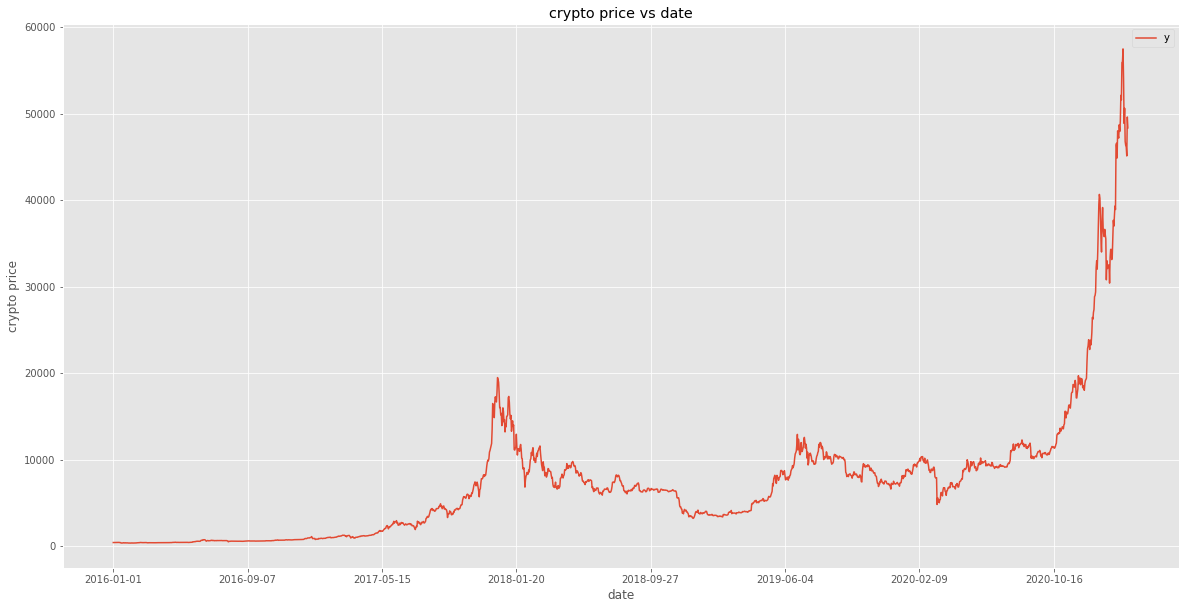

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

graph=df.set_index("ds").plot(figsize=(20,10))
graph.set_title("crypto price vs date")
graph.set_xlabel('date')
graph.set_ylabel('crypto price')

plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
Prophet

fbprophet.forecaster.Prophet

In [ ]:
INTERVAL_WIDTH = 0.9
model = Prophet(interval_width=INTERVAL_WIDTH,daily_seasonality=True)
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
future_df=model.make_future_dataframe(periods=100,freq="D")
future_df

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1984,2021-06-07
1985,2021-06-08
1986,2021-06-09
1987,2021-06-10


In [ ]:
predict = model.predict(future_df)
predict_100_days = predict[['yhat']].iloc[[-1]]

In [ ]:
predict_100_days

,yhat
1988,38190.201409


In [ ]:
from fbprophet.diagnostics import cross_validation

df_cv=cross_validation(model,
                       initial="900 days",
                       period="50 days",
                       horizon="100 days"
                       )
df_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-07-27 00:00:00 and 2020-11-23 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-07-28,6242.744870,4848.404734,7626.533197,8182.251667,2018-07-27
1,2018-07-29,6176.777561,4830.697096,7519.966508,8206.341667,2018-07-27
2,2018-07-30,6130.833866,4788.072559,7495.955330,8143.148333,2018-07-27
3,2018-07-31,6093.279605,4685.806395,7422.386128,7916.800833,2018-07-27
4,2018-08-01,6032.744120,4694.500653,7400.763700,7570.869167,2018-07-27
...,...,...,...,...,...,...
1795,2021-02-27,13839.595208,11327.797157,16281.397288,46340.310000,2020-11-23
1796,2021-02-28,13815.920947,11201.027379,16422.538065,46155.870000,2020-11-23
1797,2021-03-01,13785.398694,11340.207338,16380.858337,45113.920000,2020-11-23
1798,2021-03-02,13761.825994,11080.894355,16292.165666,49618.430000,2020-11-23


In [ ]:
from fbprophet.diagnostics import performance_metrics

perf_df=performance_metrics(df_cv)
perf_df

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,5.505561e+06,2346.393263,1911.553035,0.240974,0.192566,0.550000
1,11 days,5.573224e+06,2360.767764,1915.496305,0.240224,0.190977,0.561111
2,12 days,5.547415e+06,2355.295051,1913.381035,0.240228,0.190977,0.561111
3,13 days,5.546127e+06,2355.021616,1913.843872,0.239538,0.190977,0.561111
4,14 days,5.571242e+06,2360.347768,1916.053554,0.237796,0.187156,0.572222
...,...,...,...,...,...,...,...
86,96 days,1.341835e+08,11583.758998,7401.397899,0.648473,0.599262,0.194444
87,97 days,1.359298e+08,11658.893440,7486.114607,0.651564,0.607962,0.200000
88,98 days,1.372774e+08,11716.543913,7571.951995,0.655613,0.614996,0.205556
89,99 days,1.376796e+08,11733.694395,7640.158622,0.659320,0.614996,0.211111


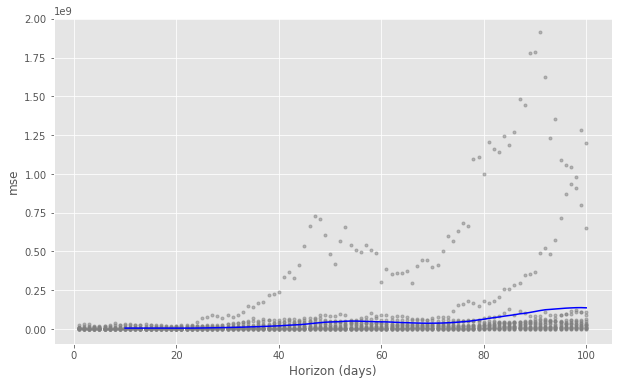

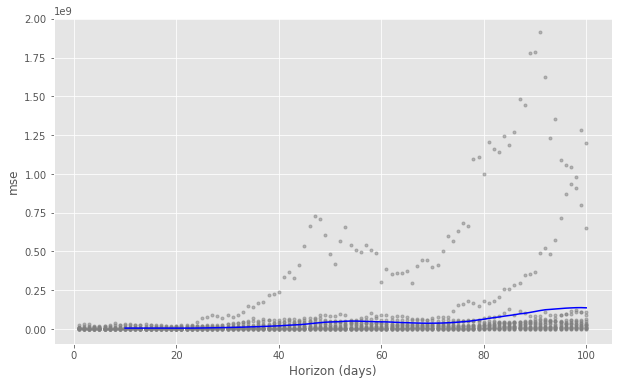

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='mse')